Importing the necessary libraries

In [1]:

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


Reading the Dataset through Pandas

In [2]:
house_df_main = pd.read_csv('housing.csv')
house_df = house_df_main.copy()

In [4]:
# loading the top 10 rows of the data
house_df.head(10)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
5,-122.25,37.85,52.0,919.0,213.0,413.0,193.0,4.0368,269700.0,NEAR BAY
6,-122.25,37.84,52.0,2535.0,489.0,1094.0,514.0,3.6591,299200.0,NEAR BAY
7,-122.25,37.84,52.0,3104.0,687.0,1157.0,647.0,3.1200,241400.0,NEAR BAY
8,-122.26,37.84,42.0,2555.0,665.0,1206.0,595.0,2.0804,226700.0,NEAR BAY
9,-122.25,37.84,52.0,3549.0,707.0,1551.0,714.0,3.6912,261100.0,NEAR BAY


Exploratory Data Analysis to understand the dataset, data patterns, relationshps, outliers, and prepare the data for further analysis or modeling.

In [5]:
#Get the stastical description of each column
house_df.describe(include='all')

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,<1H OCEAN
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9136
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909,NaN
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874,NaN
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000,NaN
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000,NaN
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000,NaN
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000,NaN


In [6]:
# check the null valuse in the dataset
house_df.isnull().sum()


,0
longitude,0
latitude,0
housing_median_age,0
total_rooms,0
total_bedrooms,207
population,0
households,0
median_income,0
median_house_value,0
ocean_proximity,0


In [7]:
# Replacing the null values with the mean of the data
house_df.total_bedrooms.fillna(house_df.total_bedrooms.median(), inplace=True)
house_df.isna().sum()

<ipython-input-7-03c4e326de81>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  house_df.total_bedrooms.fillna(house_df.total_bedrooms.median(), inplace=True)


,0
longitude,0
latitude,0
housing_median_age,0
total_rooms,0
total_bedrooms,0
population,0
households,0
median_income,0
median_house_value,0
ocean_proximity,0


In [8]:
#check the datatype of each column
house_df.dtypes

,0
longitude,float64
latitude,float64
housing_median_age,float64
total_rooms,float64
total_bedrooms,float64
population,float64
households,float64
median_income,float64
median_house_value,float64
ocean_proximity,object


In [16]:
from sklearn.preprocessing import LabelEncoder, StandardScaler, RobustScaler

In [17]:
#Encoding the categorical values of the column ocean_proximity
le = LabelEncoder()
house_df.ocean_proximity = le.fit_transform(house_df.ocean_proximity)

<Axes: >

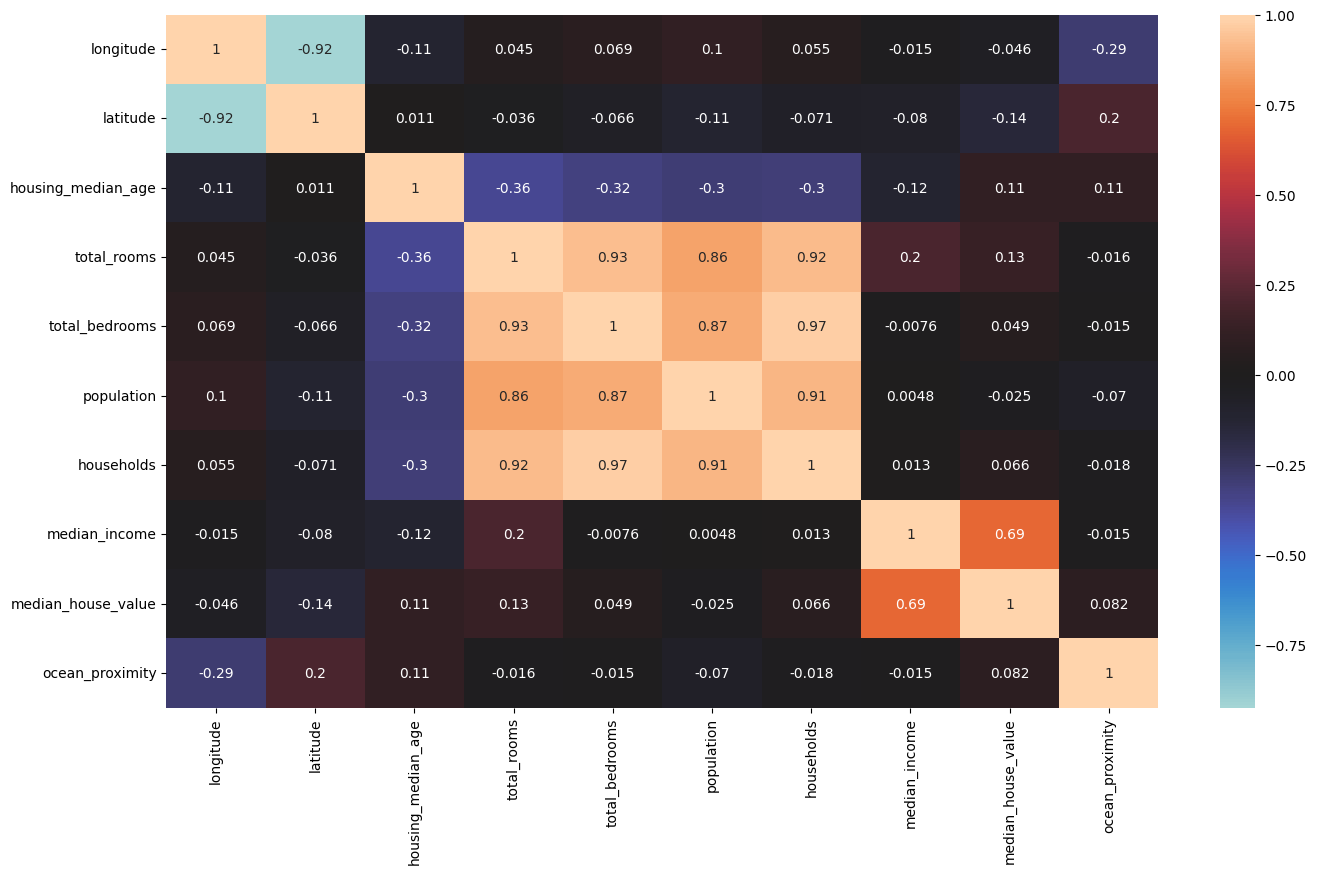

In [18]:
#initial Correlation plot between the variable to check visually explore the relationships between variables in dataset.
plt.figure(figsize = (16,9))
sns.heatmap(house_df.corr(),annot=True,center=0 )

array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>],
       [<Axes: title={'center': 'ocean_proximity'}>, <Axes: >, <Axes: >]],
      dtype=object)

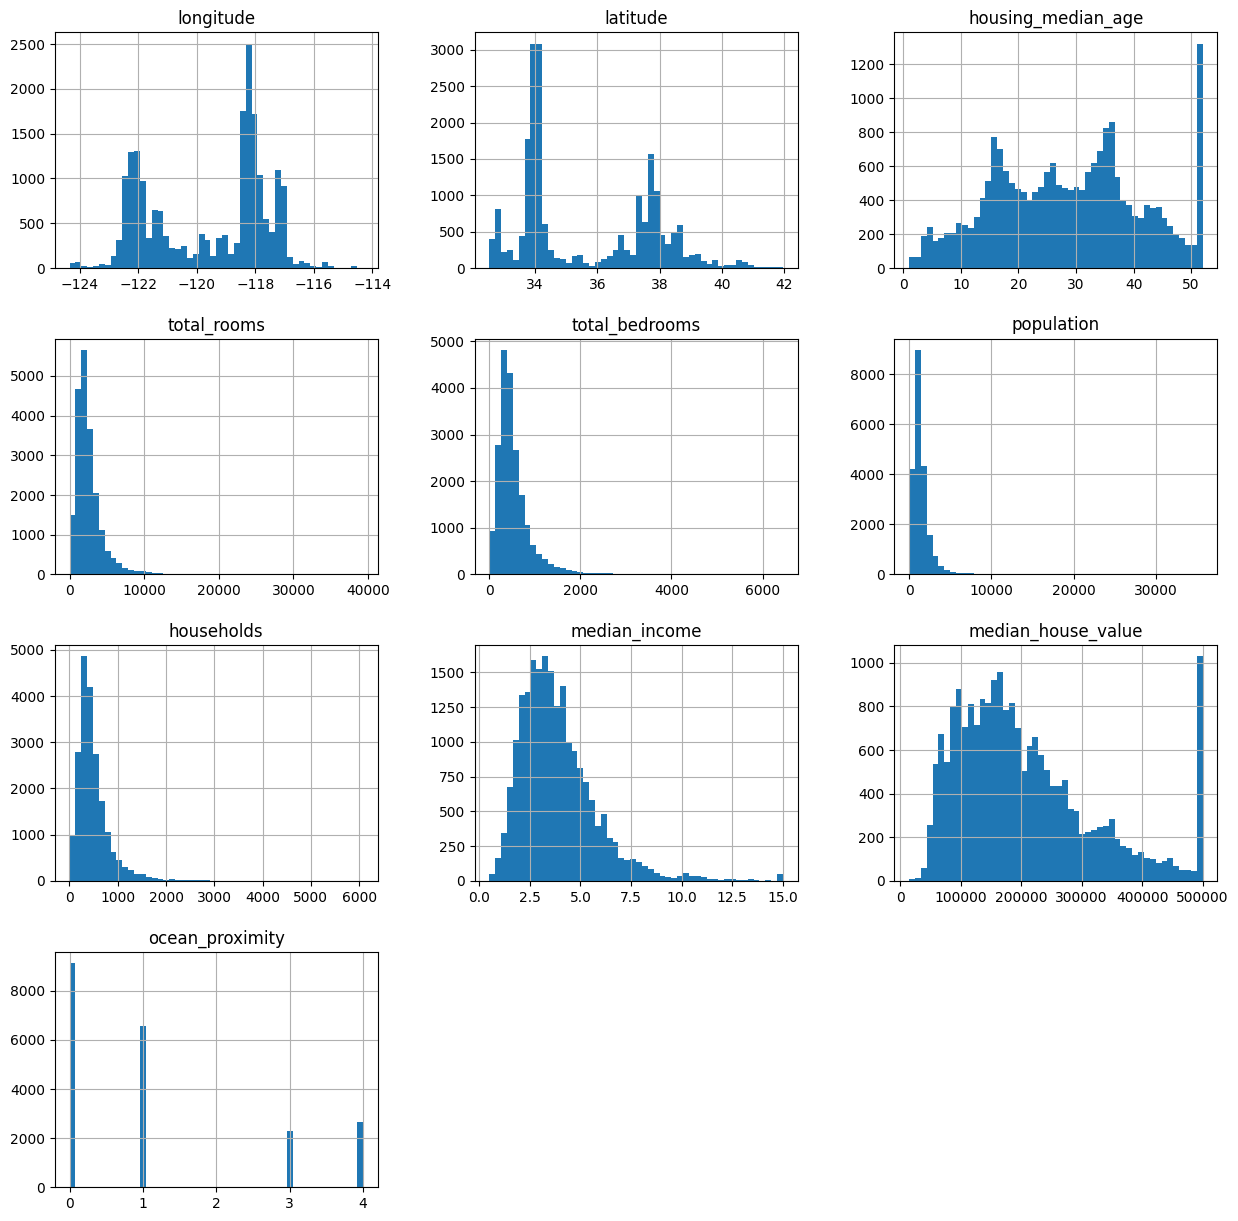

In [19]:
# Histogram Plot of the dataset
house_df.hist(bins=50, figsize=(15, 15))

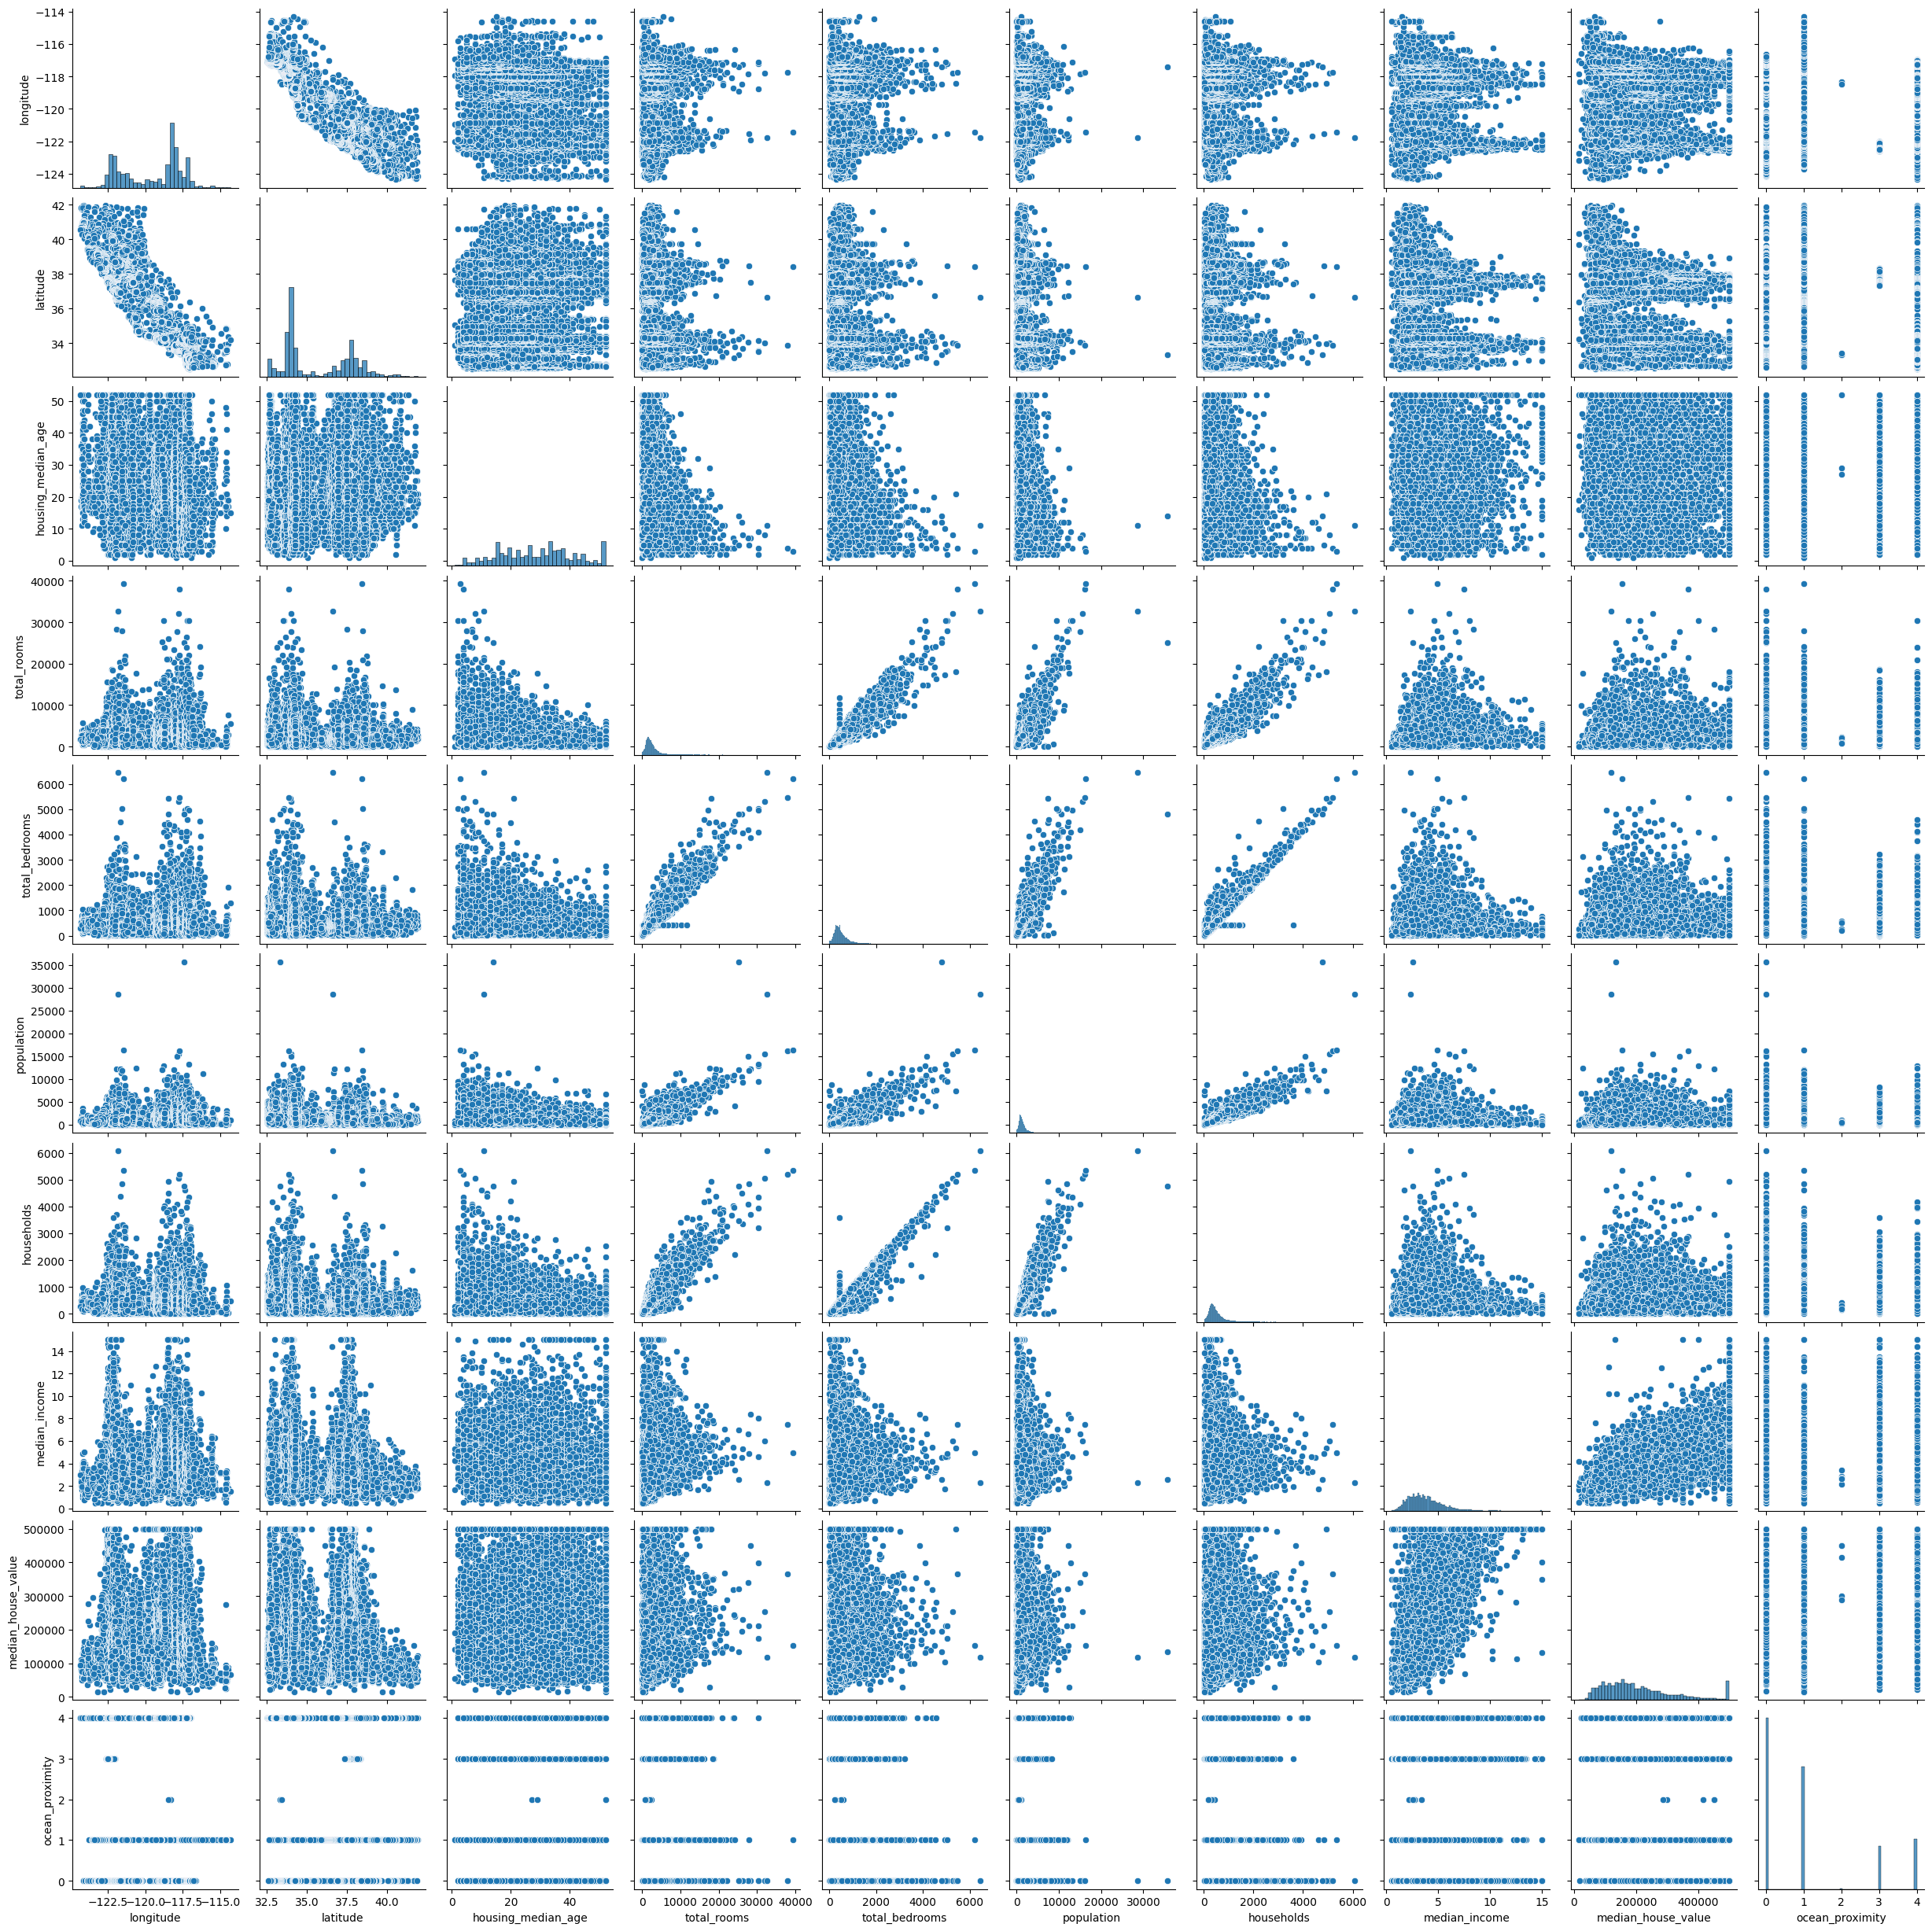

In [21]:
#Plotting the pair plot of the dataset
sns.pairplot(data=house_df)

In [22]:
#Correlation of variables with the predictive variable median_house_value
correlations = house_df.corr()
correlations["median_house_value"].sort_values(ascending=False)

,median_house_value
median_house_value,1.000000
median_income,0.688075
total_rooms,0.134153
housing_median_age,0.105623
ocean_proximity,0.081750
households,0.065843
total_bedrooms,0.049457
population,-0.024650
longitude,-0.045967
latitude,-0.144160


# **Plotting box plot of variables to check the outliers**

<ipython-input-23-eeeea33cf449>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=house_df,x="housing_median_age", palette="Blues")


<Axes: xlabel='housing_median_age'>

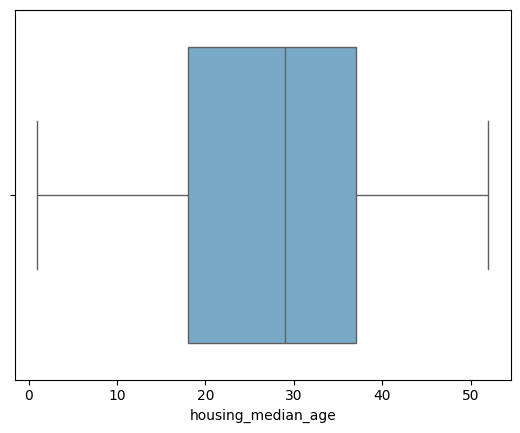

In [23]:
sns.boxplot(data=house_df,x="housing_median_age", palette="Blues")

<ipython-input-24-f23f1e09e99c>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=house_df,x="total_rooms", palette="Blues")


<Axes: xlabel='total_rooms'>

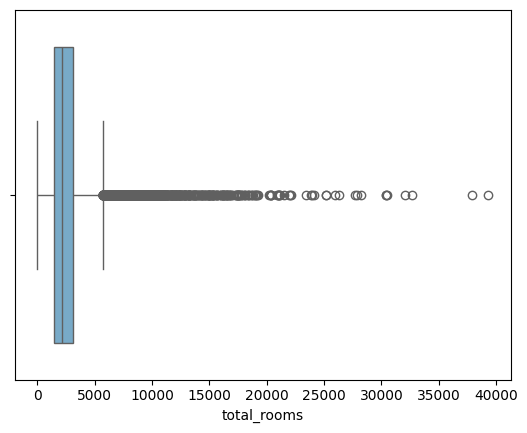

In [24]:
sns.boxplot(data=house_df,x="total_rooms", palette="Blues")

<ipython-input-25-99cdf5106b05>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=house_df,x="total_bedrooms", palette="Blues")


<Axes: xlabel='total_bedrooms'>

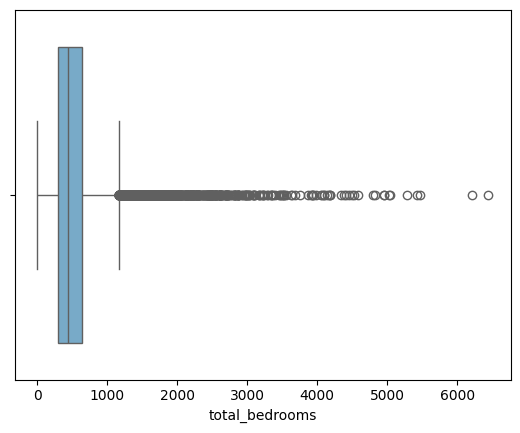

In [25]:
sns.boxplot(data=house_df,x="total_bedrooms", palette="Blues")

<ipython-input-26-7e4f037b0fb8>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=house_df,x="median_income", palette="Blues")


<Axes: xlabel='median_income'>

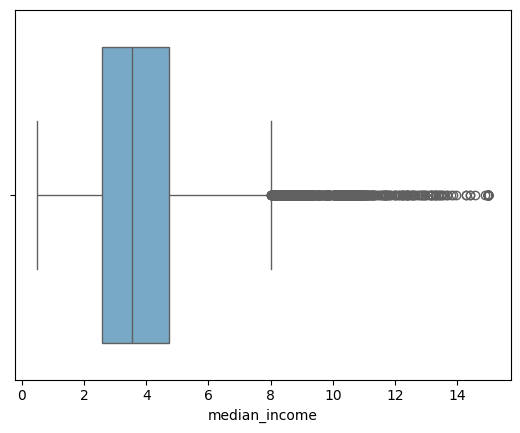

In [26]:
sns.boxplot(data=house_df,x="median_income", palette="Blues")

<ipython-input-27-4a4900647687>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=house_df,x="median_house_value", palette="Blues")


<Axes: xlabel='median_house_value'>

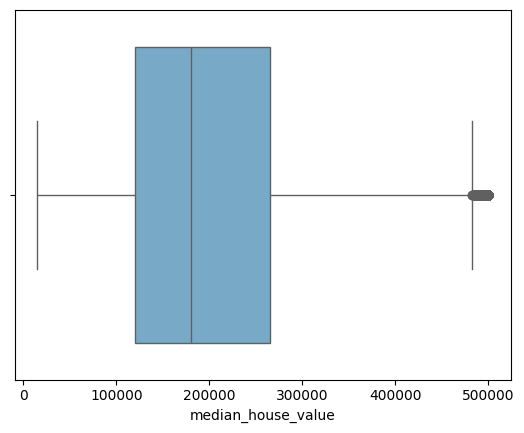

In [27]:
sns.boxplot(data=house_df,x="median_house_value", palette="Blues")

In [30]:
#Loading the libraries to remove outliers
import datasist as ds
from datasist.structdata import detect_outliers

In [31]:
#Removing the outliers from the data
outlier= detect_outliers(house_df,0,[ 'total_rooms', 'total_bedrooms',"population","households","median_income","median_house_value"])
len(outlier)
house_df.drop(outlier,inplace=True)

In [32]:
house_df.shape

(17609, 10)

# **Preparing the data for model Training**

In [34]:
# median_house_value as the predictive variable
x = house_df.drop('median_house_value', axis=1)
y = house_df['median_house_value']

In [36]:
# Splitting the dataset into training and testing with 80 : 20 ratio
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2,random_state=123)

In [37]:
# Standardising the data to bring the data into common scale
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaler.fit(x_train)
x_train=scaler.fit_transform(x_train)
x_test=scaler.transform(x_test)

In [38]:
#Importing the necessary models and hyperparameter tuning libraries
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor

In [39]:
# Define Models with Hyperparameter Grids
param_grid = {
    "Ridge Regression": (Ridge(), {"alpha": [0.1, 1.0, 10.0]}),
    "Lasso Regression": (Lasso(), {"alpha": [0.01, 0.1, 1.0]}),
    "Decision Tree": (DecisionTreeRegressor(), {"max_depth": [5, 10, 15], "min_samples_split": [2, 5, 10]}),
    "Random Forest": (RandomForestRegressor(), {"n_estimators": [50, 100, 200], "max_depth": [10, 20, None]}),
    "Gradient Boosting": (GradientBoostingRegressor(), {"n_estimators": [50, 100, 200], "learning_rate": [0.01, 0.1, 0.2]}),
    "Support Vector Regressor": (SVR(), {"C": [0.1, 1, 10], "kernel": ["linear", "rbf"]}),
    "K-Nearest Neighbors": (KNeighborsRegressor(), {"n_neighbors": [3, 5, 10]})
}

# Store Results
results = []

In [40]:
import joblib
import numpy as np
import pandas as pd
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

results = []

for name, (model, params) in param_grid.items():
    grid_search = GridSearchCV(model, params, cv=5, scoring="r2", n_jobs=-1)
    grid_search.fit(x_train, y_train)

    best_model = grid_search.best_estimator_
    y_pred = best_model.predict(x_test)

    # Performance Metrics
    r2 = r2_score(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))

    results.append({
        "Model": name,
        "Best Params": grid_search.best_params_,
        "R² Score": r2,
        "MAE": mae,
        "RMSE": rmse
    })

# Convert Results to DataFrame
results_df = pd.DataFrame(results).sort_values(by="R² Score", ascending=False)

# Display Results
print(results_df)


                      Model                                  Best Params  \
3             Random Forest     {'max_depth': None, 'n_estimators': 200}   
4         Gradient Boosting  {'learning_rate': 0.2, 'n_estimators': 200}   
6       K-Nearest Neighbors                          {'n_neighbors': 10}   
2             Decision Tree   {'max_depth': 10, 'min_samples_split': 10}   
1          Lasso Regression                               {'alpha': 1.0}   
0          Ridge Regression                               {'alpha': 1.0}   
5  Support Vector Regressor                {'C': 10, 'kernel': 'linear'}   

   R² Score           MAE          RMSE  
3  0.791407  29414.933004  43113.573386  
4  0.786251  30731.006146  43643.199959  
6  0.687384  37024.040630  52780.076951  
2  0.678724  36540.595114  53506.103225  
1  0.614750  44254.219257  58591.694614  
0  0.614743  44254.510410  58592.164805  
5  0.414387  54197.616476  72238.694561  


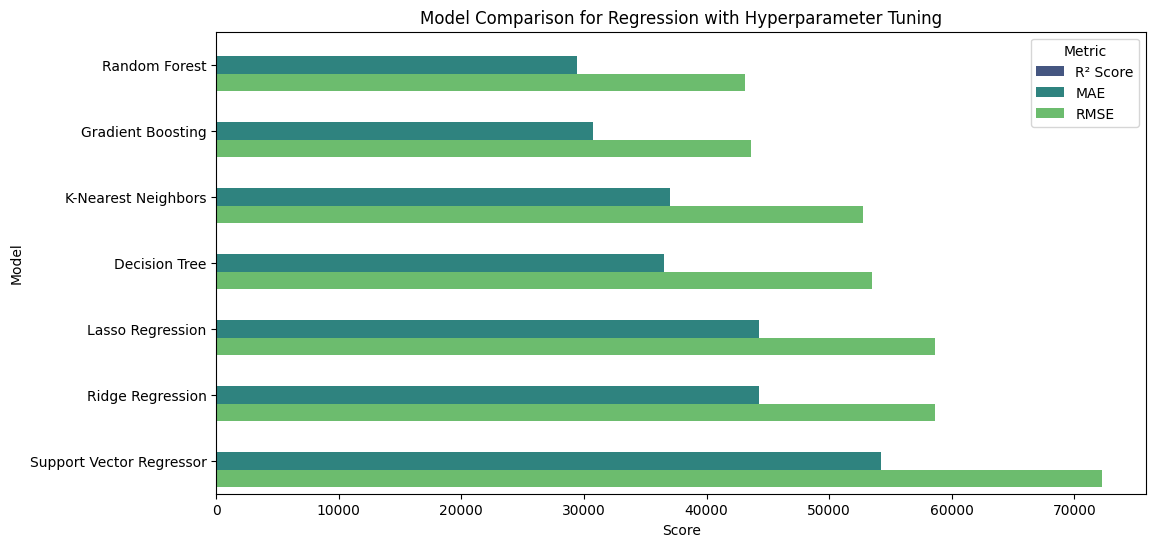

In [41]:
# Visualization
plt.figure(figsize=(12, 6))
sns.barplot(data=results_df.melt(id_vars=["Model", "Best Params"]), x="value", y="Model", hue="variable", palette="viridis")
plt.xlabel("Score")
plt.title("Model Comparison for Regression with Hyperparameter Tuning")
plt.legend(title="Metric")
plt.show()

In [42]:
best_model = None
best_score = float("-inf")
best_model_name = ""
best_params = {}
for name, (model, params) in param_grid.items():
    grid_search = GridSearchCV(model, params, cv=5, scoring="r2", n_jobs=-1)
    grid_search.fit(x_train, y_train)

    # Get best model and parameters
    if grid_search.best_score_ > best_score:
        best_score = grid_search.best_score_
        best_model = grid_search.best_estimator_
        best_model_name = name
        best_params = grid_search.best_params_

# Save Best Model
joblib.dump(best_model, "best_model.pkl")
print(f"Best Model '{best_model_name}' saved as 'best_model.pkl'")
print(f"Best Parameters: {best_params}")


Best Model 'Gradient Boosting' saved as 'best_model.pkl'
Best Parameters: {'learning_rate': 0.2, 'n_estimators': 200}
